In [54]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [41]:
df_numeric=pd.read_csv("train_numeric.csv", nrows=1000)
df_date=pd.read_csv("train_date.csv", nrows=1000)
df_categorical=pd.read_csv("train_categorical.csv", nrows=1000)

C:\Users\Syst3m\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,335,407,410,413,416,419,422,425,428,431,434,437,440,443,446,449,452,455,458,461,464,467,470,473,476,479,482,485,488,491,494,497,500,503,506,509,512,515,518,611,614,617,620,623,626,629,632,635,638,641,644,647,650,653,656,659,662,665,668,671,674,677,680,683,686,689,692,695,698,701,704,707,710,713,716,719,722,1005,1007,1008,1010,1011,1013,1014,1016,1017,1019,1020,1022,1023,1025,1026,1028,1029,1031,1032,1034,1035,1037,1038,1040,1041,1043,1044,1046,1047,1049,1050,1052,1126,1129,1132,1135,1138,1141,1144,1147,1183,1185,1188,1191,1194,1197,1200,1203,1206,1209,1212

In [51]:
#only works for numeric and date dataset. categorical data must be converted to float first.
def station_measurement(df, station_id, workpiece_index, start_index=0):
    
    if(string for string in df.columns if station_id in string):
        station_para=[string for string in df.columns if station_id in string]
        #plot measurements
        plt.figure(figsize=(25,4))
        plt.plot(station_para[start_index:], df.loc[workpiece_index, station_para[start_index:]])
        plt.title('Line_Station: {}, start_parameter: {}, end_parameter: {}'.format(station_id, station_para[start_index], 
                                                      station_para[-1]), fontsize=15)
        plt.xlabel('Station and Features', fontsize=12)
        plt.xticks(rotation=90)
        plt.ylabel('Measurements', fontsize=12)
        plt.show()
    else:
        print('This station is not in the dataset!')

In [50]:
#only works for numeric and date dataset. categorical data must be converted to float first.
def workpiece_measurement(df, workpiece_index):
    plt.figure(figsize=(25,4))
    if(df.columns[-1]=='Response'):
        plt.plot(df.columns[1:-1], df.loc[workpiece_index, df.columns[1:-1]])
    else:
        plt.plot(df.columns[1:], df.loc[workpiece_index, df.columns[1:]])
    plt.title('Measurements of workpiece number {}'.format(workpiece_index))
    plt.xlabel('Station and Features', fontsize=12)
    plt.xticks(np.arange(0, len(df.columns[1:-1])+1, step=15), rotation=90)
    plt.ylabel('Measurements', fontsize=12)
    plt.show()

In [48]:
#plot timestamp-based numeric value changes for a selected station in date and numeric dataframe
def plot_date_numeric(dfdate, dfnumeric, station_id):
    
    #all time values for first date of station
    station_date=dfdate.loc[:, [string for string in dfdate.columns if station_id in string][0]]
    
    #list of all station features
    station_para=[string for string in dfnumeric.columns if station_id in string][0]

    plt.plot(station_date.loc[dfnumeric.loc[dfnumeric['Response']==0,:].index], 
             dfnumeric.loc[dfnumeric['Response']==0, station_para], c='r')
    plt.plot(station_date.loc[dfnumeric.loc[dfnumeric['Response']==1,:].index], 
             dfnumeric.loc[dfnumeric['Response']==1, station_para], c='b')
    plt.title('Line_Station: {}, parameter: {}'.format(station_id, station_para), fontsize=15)
    plt.xlabel('Station timestamp', fontsize=10)
    plt.ylabel('Values of {}'.format(station_para[0:5]), fontsize=10)
    plt.show()

Some examples:

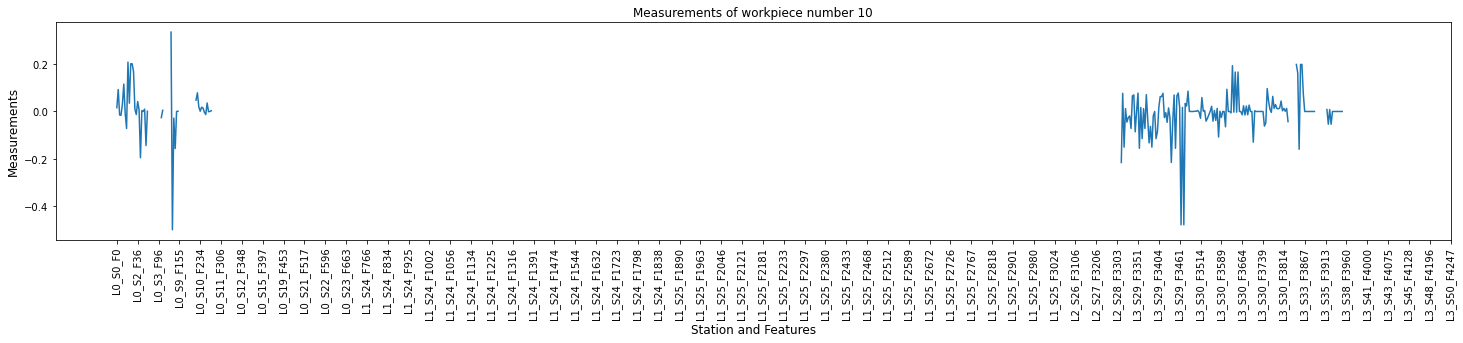

In [52]:
workpiece_measurement(df_numeric, 10)

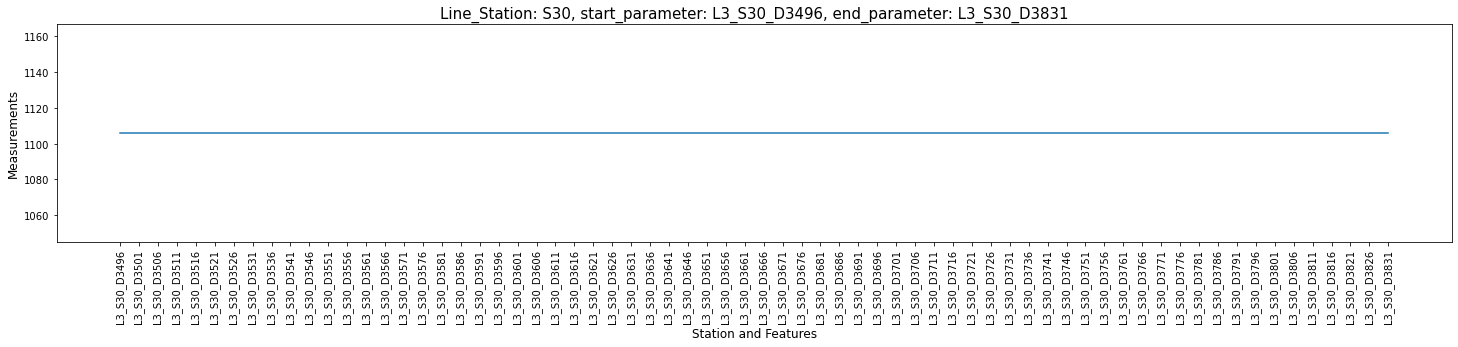

In [45]:
station_measurement(df_date, 'S30', 10)

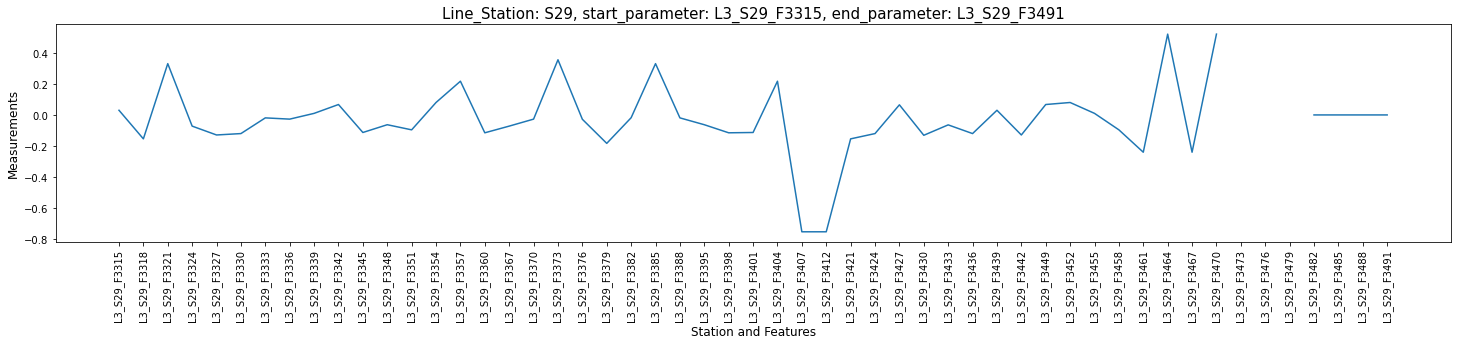

In [46]:
station_measurement(df_numeric, 'S29', 100)

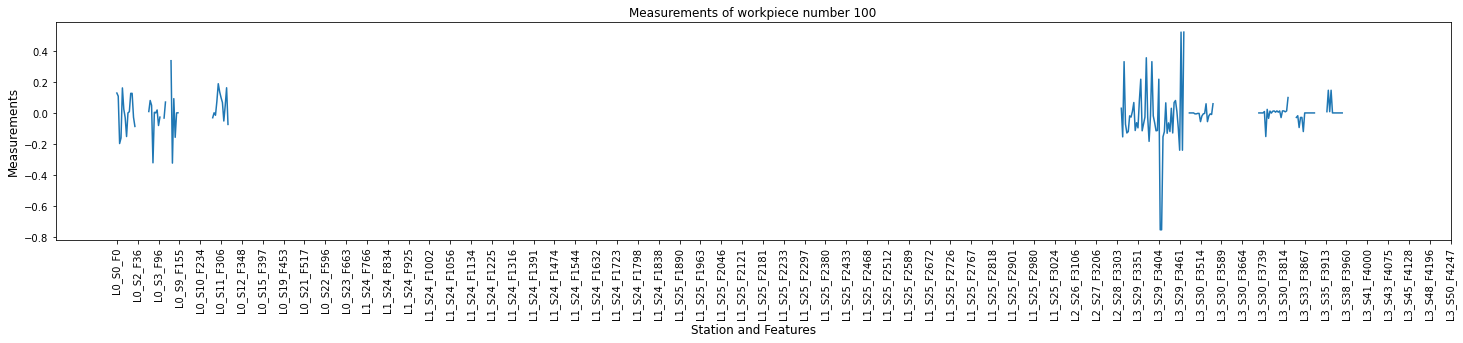

In [47]:
workpiece_measurement(df_numeric, 100)

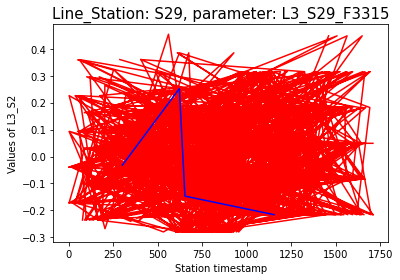

In [49]:
plot_date_numeric(df_date, df_numeric, 'S29')